In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from xgboost import  XGBRegressor
from sklearn import metrics

In [4]:
exercise = pd.read_csv(r"D:\Ciencia de Datos\5to\Paradigmas\Tema_1\1.3_Analisis_predictivo\exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
calories = pd.read_csv(r"D:\Ciencia de Datos\5to\Paradigmas\Tema_1\1.3_Analisis_predictivo\calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
cal_data = pd.concat([exercise,calories['Calories']],axis=1)
cal_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
cal_data.shape

(15000, 9)

In [8]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='Gender', ylabel='count'>

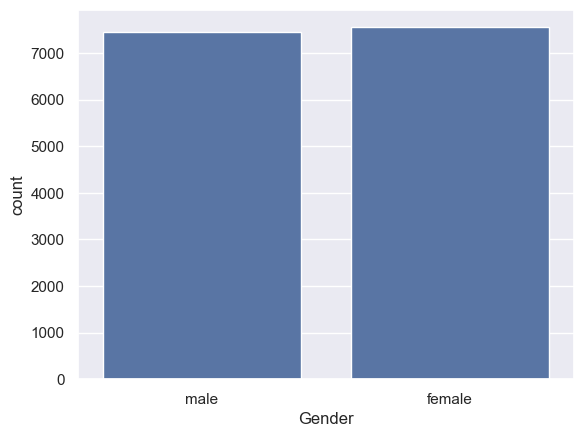

In [9]:
# Visualizaciones
sns.countplot(x='Gender',data=cal_data)

<Axes: xlabel='Age', ylabel='Count'>

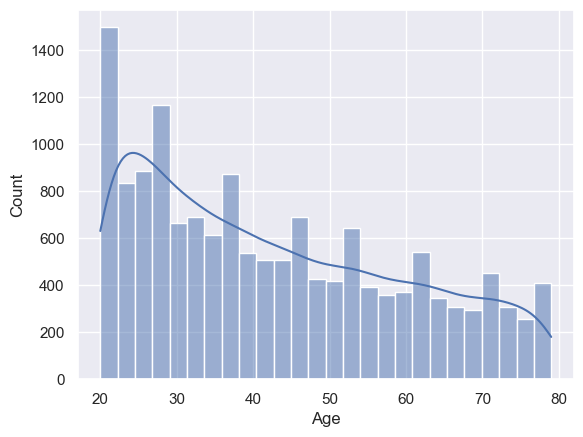

In [10]:
sns.histplot(cal_data.Age, kde=True)

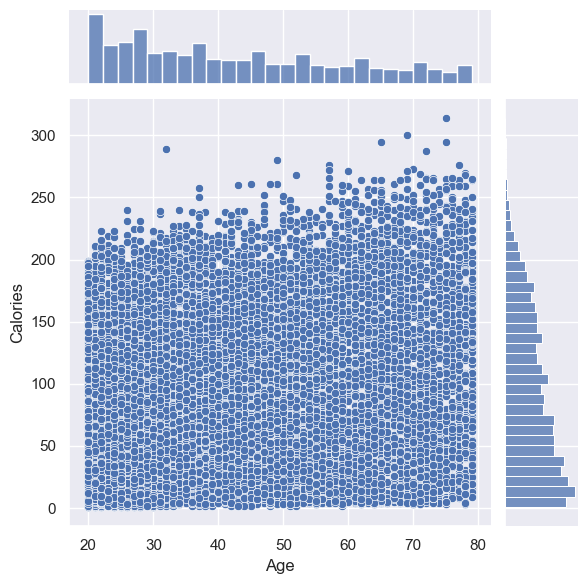

In [11]:
sns.jointplot(x = 'Age', y = 'Calories', data = cal_data)

<Axes: xlabel='Weight', ylabel='Count'>

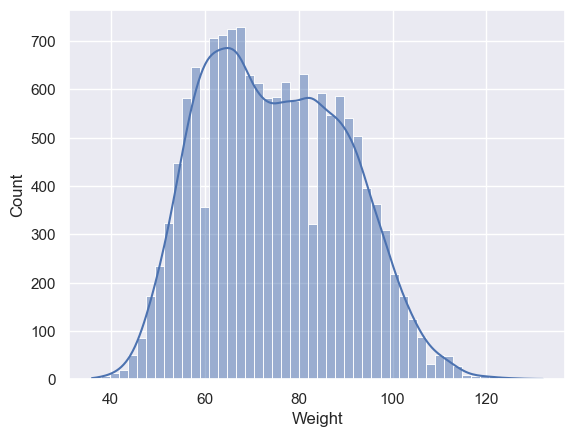

In [12]:
sns.histplot(cal_data.Weight, kde=True)

In [13]:
# Correlacion
corr = cal_data.drop(['Gender'], axis=1).corr()
corr


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

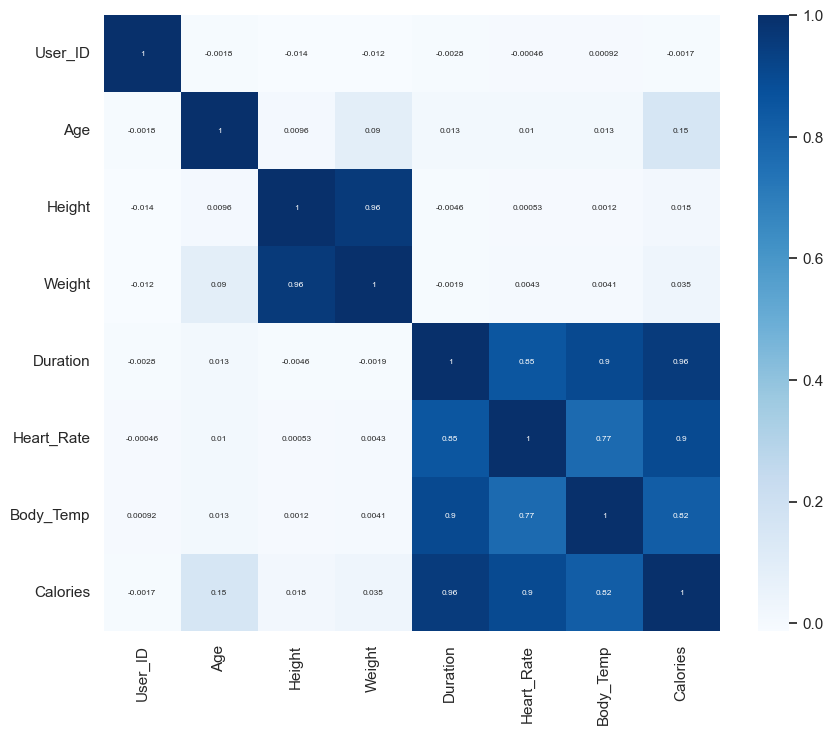

In [14]:
# Mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr, square=True, cbar=True, annot=True, cmap='Blues', annot_kws={'size':6})

In [15]:
# Gender => mapa con diccionario
cal_data.replace({'Gender':{'male':0, 'female':1}}, inplace= True)
cal_data.head()

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_26892\265372749.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cal_data.replace({'Gender':{'male':0, 'female':1}}, inplace= True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
# Seprar la matirz de predictoras y objetivo
X = cal_data.drop(columns=['User_ID', 'Calories'], axis=1)
y = cal_data.Calories

In [17]:
#Entrenamiento y pruebas
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=2)
X.shape, X_train.shape, X_test.shape

((15000, 7), (12000, 7), (3000, 7))

In [18]:
# Modelo XGB
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
# Prediccion
y_hat = xgb.predict(X_test)

In [20]:
#Evaluacion
mae = metrics.mean_absolute_error(y_test, y_hat)
print('MAE:', mae)
mse = metrics.mean_squared_error(y_test, y_hat)
print('MSE:', mse)

MAE: 1.4833678883314132
MSE: 4.710710012461346


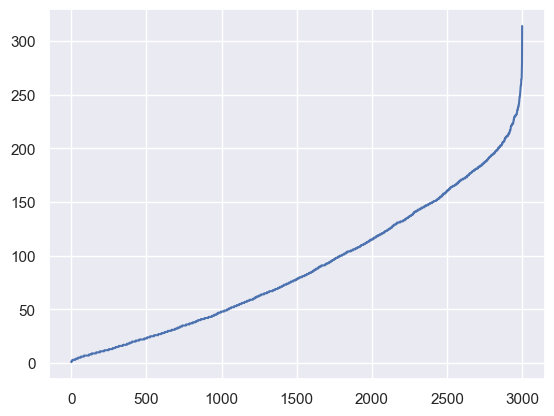

In [21]:
plt.plot(np.sort(y_test))

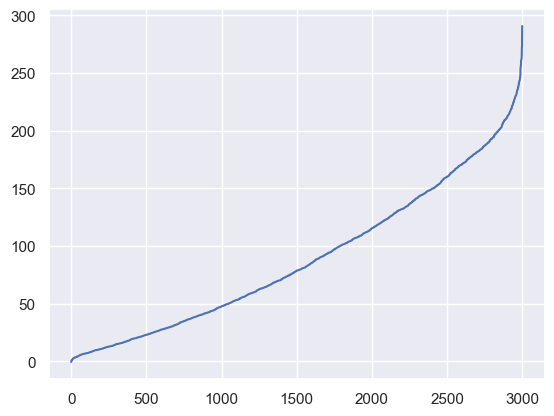

In [22]:
plt.plot(np.sort(y_hat))